<img src="https://cdn.siberian.dev/siberian.png" alt="Siberian Logo">

LGBM Regression using Dataset

This Code template is for regression analysis using LGBM along with Dataset.Dataset is an internal data structure that is used by the LGBM framework. It is optimized for both memory efficiency and training speed.

### Required Packages

In [75]:
import warnings
import numpy as np 
import pandas as pd 
import seaborn as se 
import matplotlib.pyplot as plt 
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
warnings.filterwarnings('ignore')

### Initialization

Filepath of CSV file

In [106]:
#filepath
file_path = ""

List of features which are  required for model training .

In [107]:
#x_values
features = []

Target feature for prediction.

In [108]:
#y_value
target = ''

### Data Fetching

Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [109]:
df=pd.read_csv(file_path)
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


### Feature Selections

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X and target/outcome to Y.

In [110]:
X = df[features]
Y = df[target]

### Data Preprocessing

Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.


In [111]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)

Calling preprocessing functions on the feature and target set.

In [112]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])
X=EncodeX(X)
Y=NullClearner(Y)
X.head()

,AT,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62


#### Correlation Map

In order to check the correlation between the features, we will plot a correlation matrix. It is effective in summarizing a large amount of data where the goal is to see patterns.

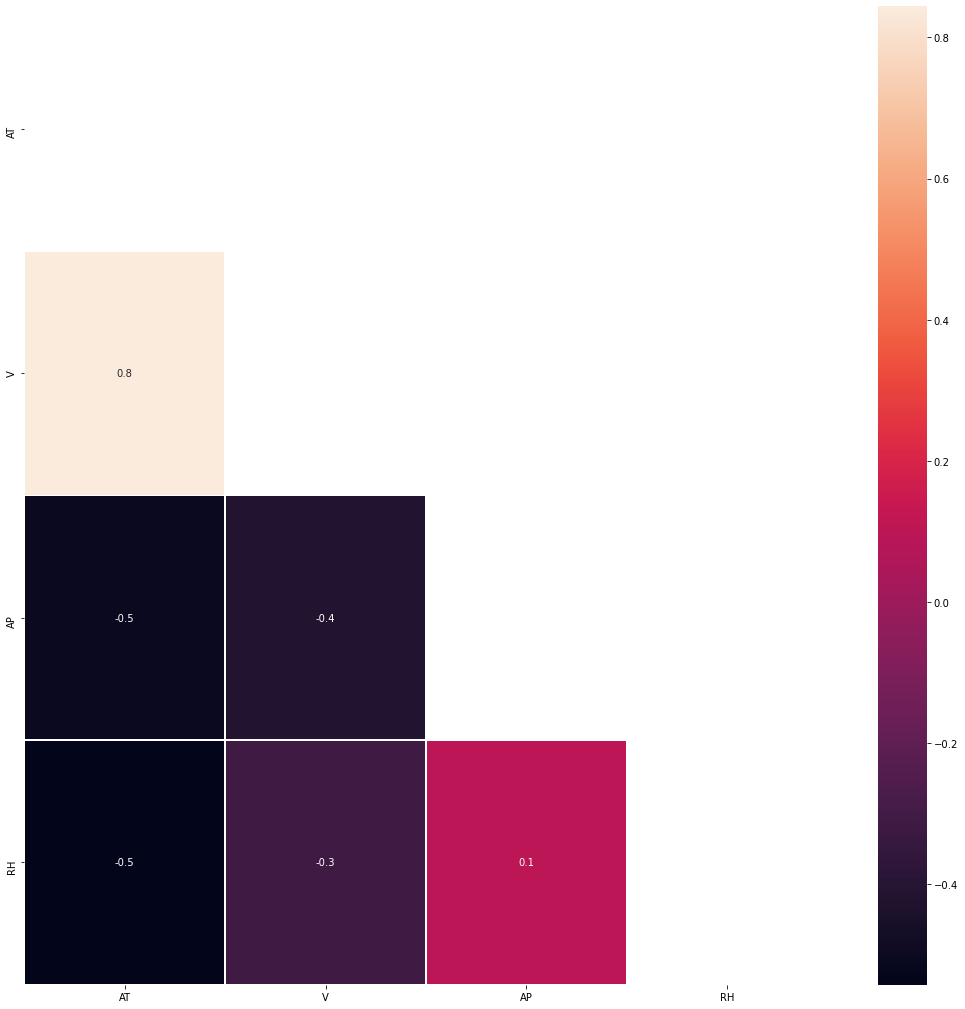

In [113]:
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
se.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)
plt.show()

### Data Splitting

The train-test split is a procedure for evaluating the performance of an algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is utilized to fit/train the model. The second subset is used for prediction. The main motive is to estimate the performance of the model on new data.

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 123)

#### Core Data Structure
We use Dataset which is a core and optimized data structure that LGBM supports and is optimized for both memory efficiency and training speed. 

##### For more information on Dataset [click here](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.Dataset.html)

In [115]:
dtrain = lgb.Dataset(X_train, label=y_train)
dtest = lgb.Dataset(X_test, label=y_test)

### Model
LGBM is a gradient boosting framework that uses tree based learning algorithms.LGBM can handle the large size of tabular data(Regression & Classification) and takes lower memory to run.It is so popular because it focuses on accuracy of results and also supports GPU learning and thus data scientists are widely using LGBM for data science application development

Refer [API](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html) 

In [116]:
params = {"metric": "rmse","learning_rate": 0.1,"verbosity": -1}
model = lgb.train(params, dtrain, valid_sets=dtest, early_stopping_rounds=100)

[1]	valid_0's rmse: 15.4292
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 14.0131
[3]	valid_0's rmse: 12.7493
[4]	valid_0's rmse: 11.6339
[5]	valid_0's rmse: 10.6399
[6]	valid_0's rmse: 9.75197
[7]	valid_0's rmse: 8.97256
[8]	valid_0's rmse: 8.27904
[9]	valid_0's rmse: 7.66718
[10]	valid_0's rmse: 7.13705
[11]	valid_0's rmse: 6.66902
[12]	valid_0's rmse: 6.2607
[13]	valid_0's rmse: 5.90817
[14]	valid_0's rmse: 5.60413
[15]	valid_0's rmse: 5.34074
[16]	valid_0's rmse: 5.11637
[17]	valid_0's rmse: 4.92066
[18]	valid_0's rmse: 4.75801
[19]	valid_0's rmse: 4.62109
[20]	valid_0's rmse: 4.50344
[21]	valid_0's rmse: 4.40503
[22]	valid_0's rmse: 4.3235
[23]	valid_0's rmse: 4.24385
[24]	valid_0's rmse: 4.18627
[25]	valid_0's rmse: 4.13761
[26]	valid_0's rmse: 4.08373
[27]	valid_0's rmse: 4.04551
[28]	valid_0's rmse: 4.01419
[29]	valid_0's rmse: 3.98904
[30]	valid_0's rmse: 3.96053
[31]	valid_0's rmse: 3.92968
[32]	valid_0's rmse: 3.90615
[33]	valid_0's rmse: 

#### Model Accuracy

We will use the trained model to make a prediction on the test set.Then use the predicted value for measuring the accuracy of our model.

> **r2_score**: The **r2_score** function computes the percentage variablility explained by our model, either the fraction or the count of correct predictions. 

> **mae**: The **mean abosolute error** function calculates the amount of total error(absolute average distance between the real data and the predicted data) by our model. 

> **mse**: The **mean squared error** function squares the error(penalizes the model for large errors) by our model. 

In [117]:
y_pred = model.predict(X_test, num_iteration=model.best_iteration)
print("Accuracy score {:.2f} %\n".format(r2_score(y_test, y_pred)*100))
print("Mean Absolute Error {:.2f}".format(mean_absolute_error(y_test,y_pred)))
print("Mean Squared Error {:.2f}".format(mean_squared_error(y_test,y_pred)))

Accuracy score 95.90 %

Mean Absolute Error 2.49
Mean Squared Error 11.88


#### Prediction Plot

First, we make use of a plot to plot the actual observations, with x_train on the x-axis and y_train on the y-axis.
For the regression line, we will use x_train on the x-axis and then the predictions of the x_train observations on the y-axis.

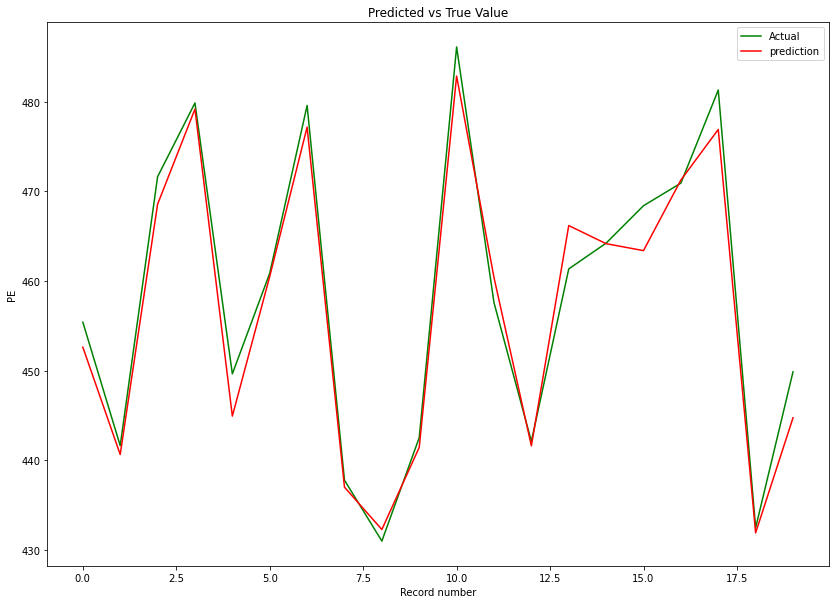

In [118]:
n=len(X_test) if len(X_test)<20 else 20
plt.figure(figsize=(14,10))
plt.plot(range(n),y_test[0:n], color = "green")
plt.plot(range(n),y_pred[0:n], color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(target)
plt.show()

#### Creator: Aishwarya Guntoju , Github: [Profile](https://github.com/DSAishwaryaG)